首先是导入MerkleTree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install pycryptodome

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

In [ ]:
import sys 
sys.path.append('/content/drive/MyDrive/Colab Notebooks/MerkleTree-master')
import Crypto
from MerkleTree import *

import random

导入成功之后，可以构建一棵最基本的树

INFO: 构建了个寂寞


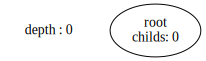

In [ ]:
# 构建一颗Merkle树
mt = MerkleTree()

# 构建数据 -> nodeData
nodeData = []

# 构建一棵树，方法选择 imbalance
mt.build_merkle_tree(nodeData, way='imbalance')

# 展示
mt.show()

这里我们看到，我们初始化来了一棵最基本的树（或树桩），左侧显示的是这棵树的高度    
我们其实可以向这棵树中添加数据，如下所示

INFO: 节点构造完成： Node(value=80, prime=101, hash=2376dafbfa541d323c177d448004a384598d5da0b391bdce4175098f08522efb)


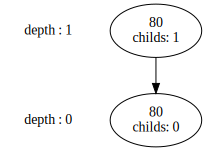

In [ ]:
# 随机构建一个数据
num = random.randint(1,99)

# 添加到树中
mt.add(str(num))

# 展示
mt.show()

INFO: 节点构造完成： Node(value=73, prime=557, hash=3dafb981386dd56e415d3a8137ab3b3777f0ac601570f04ff819cc30b7446bb0)
INFO: 节点构造完成： Node(value=34, prime=347, hash=6bd4e614d148138e6614d31be467768d4f067fb5ee1c8ff88f07a831113ab579)
INFO: 节点构造完成： Node(value=63, prime=67, hash=5d4dcbc15b7d75d843e4238cc67bc7ee15850f974a0ebcc44b70adde85220213)
INFO: 节点构造完成： Node(value=19, prime=211, hash=d57c99c5b420780739fca93202bd50938fbc1a0d2fdf7b0836a4745aae5a6551)
INFO: 节点构造完成： Node(value=76, prime=587, hash=e93a5b3274b7c0ce89a5460384583eca931586c361460dfe9ba528ccf2d207ac)
INFO: 节点构造完成： Node(value=13, prime=233, hash=27b0a6ba77d963a9020df06bb4b041ee4e2d703a96227f78b3adbe7fd970f6a4)
INFO: 节点构造完成： Node(value=68, prime=907, hash=1fc548f833ef055c1e1e512903e927dc581b4205b59ee3b5eb627871501c9576)
INFO: 节点构造完成： Node(value=12, prime=191, hash=fa0e4961609d5373996209e7f06b53405c9068c8a86b6ad8c44957b957bff71a)
INFO: 节点构造完成： Node(value=90, prime=541, hash=d0c308b3ed3b18fd2d00274a099df088b80c19dc9a02a564db003fa9456ff4f5)
IN

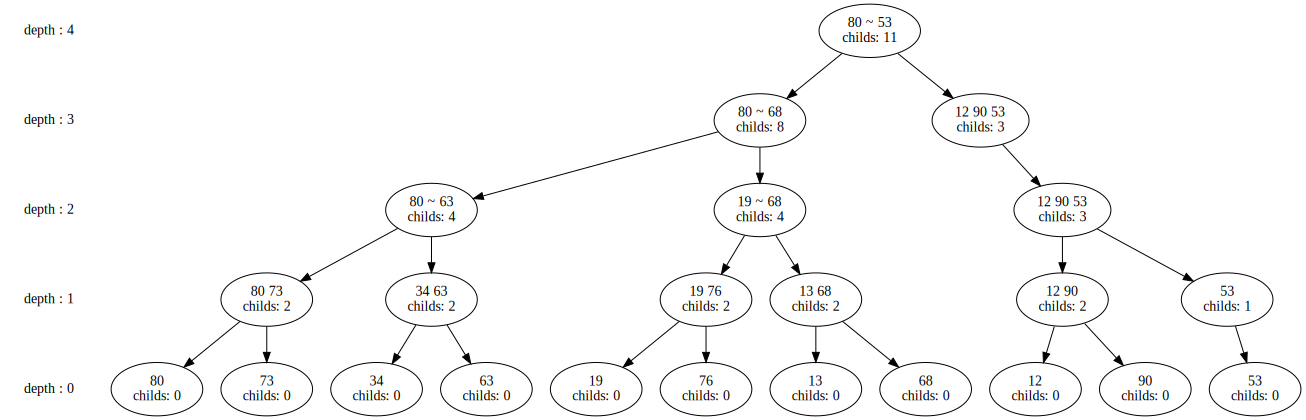

In [ ]:
# 多添加一些节点，构造 10 个节点
for _ in range(10):
    num = random.randint(1,99)
    mt.add(str(num))

# 展示
mt.show()

可以在树中标记出新增的节点  
最近一次新增加的节点使用红色进行标注 

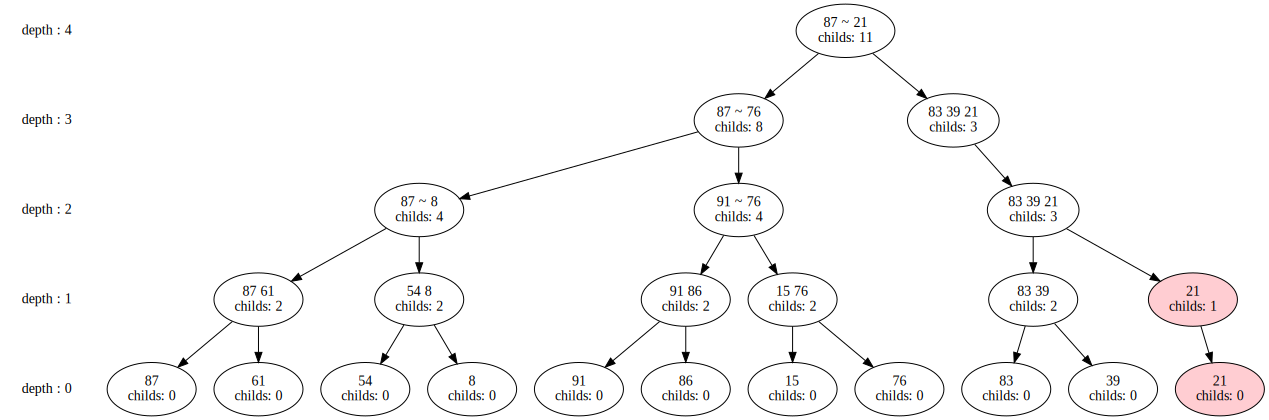

In [ ]:
mt.compare()

新增加的节点在树的最右边

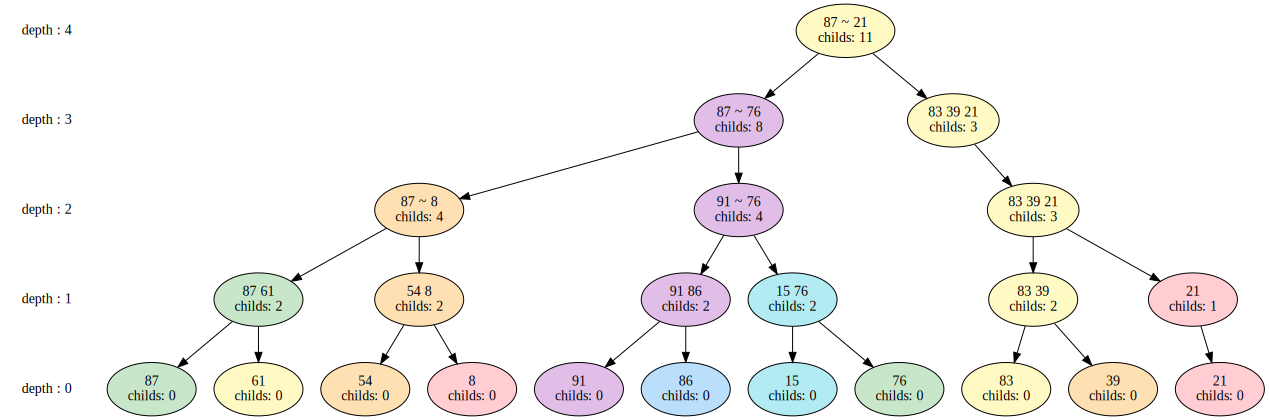

In [ ]:
# 显示每一次添加节点的情况，纵向颜色相同的 代表是同一代
mt.compare(showHistory=True)

通过不断地增加节点，我们就可以拥有一棵很茂盛的树    
有时是我们会在这棵树上进行查询的工作，有两个方面：
- 证明一个数据是不是存在
- 证明一个数据是不是不在

分析：
 
使用RSA方法：
- 为每一个 “叶子” 随机生成一个素数
- 自下而上的，父节点的 “数” 为子节点 “数” 的乘积。


In [ ]:
# 获取整棵树所有数据自己的素数id
mt.getTreePrime()

['751', '937', '307', '691', '881', '853', '719', '863', '311', '107', '269']

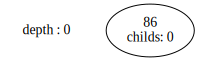

In [ ]:
# 根据知道的素数id 就可以
mynode, proofPath = mt.search(mt.getTreePrime()[5])

# 展示
mt.show(mynode)

proofPath 变量中存放着证明这个节点真实存在的 **Merkle 路径**

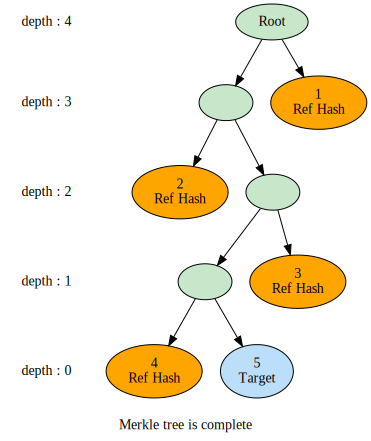

In [ ]:
# 验证一下
mt.merkle_path(proofPath)

颜色解释：
- 橙色：表示需要提供给 “请求者” 的作证 hash 值
- 蓝色：“请求者” 想要证明存在的节点
- 绿色：hash 值验证成功的节点

当我们将橙色的节点们发送给 “请求者” 的时候，可能会遇到 数据被篡改 的情况。  
这时候，我们可以再次验证

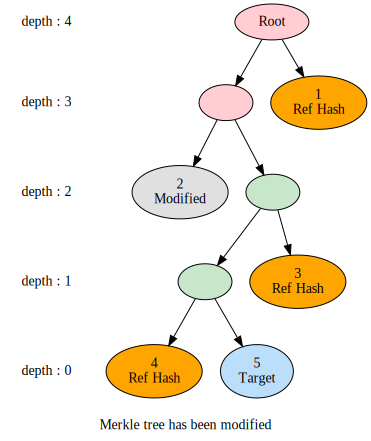

In [ ]:
# 篡改第 3 号节点的 hash 数据
proofPath_2 = mt.tampering_test(proofPath,2)

# 验证一下
mt.merkle_path(proofPath_2)

当树中的数据不再需要的时候，留着它会占用位置，但是如果删除掉其中某个数据，再重新建树，需要计算大量的hash运算    
为了避免这个问题，我们这棵树可以删除需要删除的节点

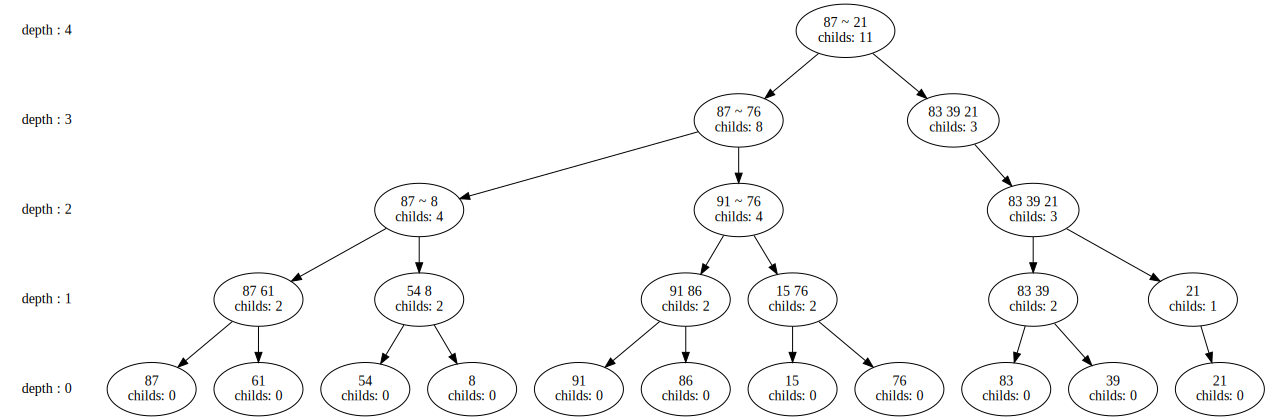

In [ ]:
# 先看一下目前这棵树的样子
mt.show(string='')

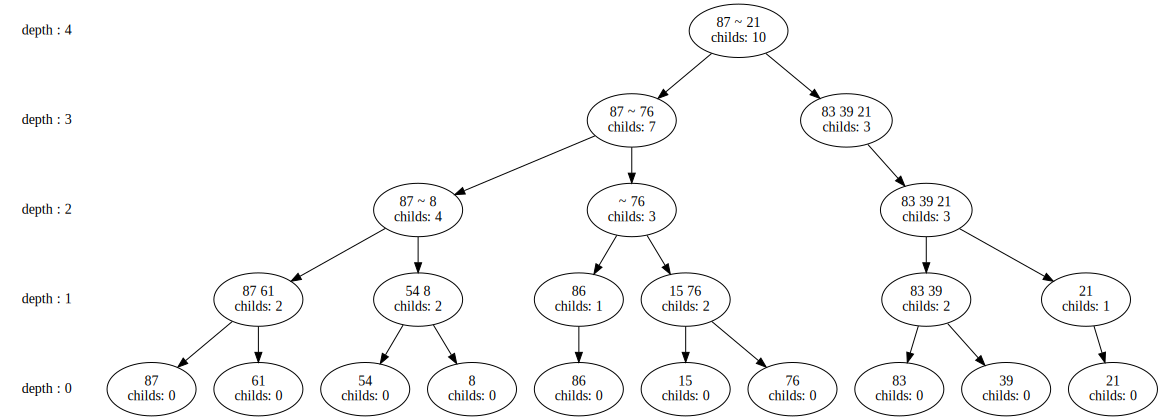

In [ ]:
# 删除这棵树的一个节点
mt.remove(mt.getTreePrime()[4])
mt.show()

删除操作之后的，我们看到了第4个节点已经被删除了   
我们还可以继续进行删除或者添加节点

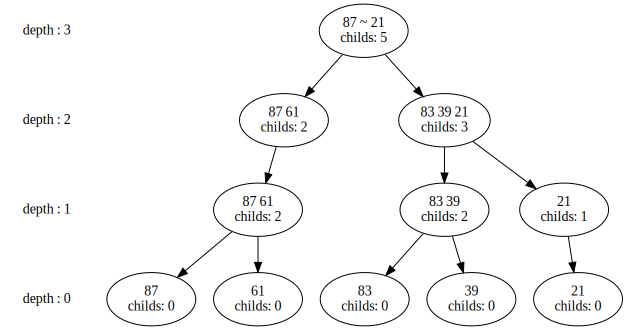

In [ ]:
# 连续五次删除第3个节点
for i in range(5):
    mt.remove(mt.getTreePrime()[2])
mt.show()

删除之后的树看起来不是那么茂盛了    
我们可以继续添加 “叶子”

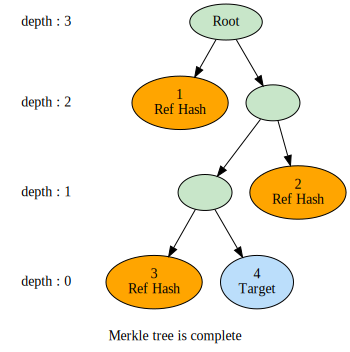

In [ ]:
mynode, proofPath = mt.search(mt.getTreePrime()[3])
mt.merkle_path(proofPath)